In [1]:
from pyhdf.SD import SD, SDC
import h5py
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import icare
import sunrise
import nasa_plotting_scripts as nasa
import plotly.graph_objects as go

In [2]:
session = icare.ICARESession('/Users/jackpeele/Documents/Data Science/NASA/HDF')
# folder = session.listdir('CALIOP/SODA-333m.v2.00/2010/2010_03_02/')

ICARE Username: jpeele
ICARE Password: ···············


In [3]:
root = 'CALIOP/SODA-333m.v2.00/2010/2010_03_04/'

def find_ACTIVATE(root):
    folder = session.listdir(root)
    PATH = []

    for data in folder:

        path = session.get_file(root + data)
        file = SD(path, SDC.READ)

        lat = np.array(file.select('Latitude').get())
        lon = np.array(file.select('Longitude').get())
        
        indices = np.where((lat > 32) & (lat < 39) & (lon > 70) & (lon < 75))
        
#         print(len(indices))
#         print(indices)
        
        if len(indices[0]) > 0:
            print(path)
            PATH.append(path)
    
    return PATH

# find_ACTIVATE(root)

In [4]:
def find_ACTIVATE_in_range(root, rng):
    '''
    parse through folders, determine which days contain ACTIVATE region
    '''
    
    MATCH = []
    
    for i in range(rng):
        print(i)

        i += 1
        # root = 'CALIOP/SODA-333m.v2.00/2010/2010_03_'

        if i < 10:
            i = '0' + str(i) + '/'
        else:
            i = str(i) + '/'

        new_root = root + i

        MATCH.append(find_ACTIVATE(new_root))
    
    return MATCH
        

# test = find_ACTIVATE_in_range('CALIOP/SODA-333m.v2.00/2010/2010_03_', 10)

In [5]:
# Match

# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_04/SODA-333m_2010-03-04T21-18-45ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_05/SODA-333m_2010-03-05T07-58-31ZD_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_06/SODA-333m_2010-03-06T21-06-36ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_07/SODA-333m_2010-03-07T07-46-22ZD_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_08/SODA-333m_2010-03-08T20-54-27ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_12/SODA-333m_2010-03-12T08-05-28ZD_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_13/SODA-333m_2010-03-13T21-13-33ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_14/SODA-333m_2010-03-14T07-53-20ZD_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_15/SODA-333m_2010-03-15T21-01-25ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_20/SODA-333m_2010-03-20T21-20-34ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_21/SODA-333m_2010-03-21T08-00-20ZD_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_22/SODA-333m_2010-03-22T21-08-25ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_23/SODA-333m_2010-03-23T07-48-11ZD_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_24/SODA-333m_2010-03-24T20-56-16ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_28/SODA-333m_2010-03-28T08-07-18ZD_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_29/SODA-333m_2010-03-29T21-15-22ZN_V2-00.hdf
# /Users/jackpeele/Documents/Data Science/NASA/HDF/CALIOP/SODA-333m.v2.00/2010/2010_03_31/SODA-333m_2010-03-31T21-03-14ZN_V2-00.hdf

In [114]:
path = session.get_file('CALIOP/SODA-333m.v2.00/2010/2010_03_12/SODA-333m_2010-03-12T08-05-28ZD_V2-00.hdf')
file = SD(path, SDC.READ)

In [115]:
datasets_dic = file.datasets()

for idx,sds in enumerate(datasets_dic.keys()):
    print(idx,sds)

0 Latitude
1 Longitude
2 TAI_Time
3 GMAO_Altitudes
4 VFM_Altitudes
5 Total_Attenuated_Surface_Cross_Section_532
6 Total_Attenuated_Surface_Cross_Section_1064
7 Perpendicular_Attenuated_Surface_Cross_Section_532
8 CPR_Attenuated_Cross_Section
9 Depolarization_Aerosol_Upper_Layer
10 AMSR_E_Surface_Wind_Speed
11 AMSR_E_Atmospheric_Water_Vapor
12 AMSR_E_cloud_liquid_water_path
13 AMSR_E_Sea_Surface_Temperature
14 GMAO_Ozone
15 GMAO_Pressure
16 GMAO_Temperature
17 GMAO_relative_humidity
18 Optical_Depth_CPR_CAL532
19 Optical_Depth_CPR_CAL1064
20 Optical_Depth_AMSR_CAL532
21 Optical_Depth_AMSR_CAL1064
22 Optical_Depth_MODIS_550
23 Optical_Depth_MODIS_1064
24 Optical_Depth_532_Over_Liquid_Water_Cloud
25 Optical_Depth_1064_Over_Liquid_Water_Cloud
26 Angstrom_Exponent
27 Lidar_Ratio_532
28 Lidar_Ratio_1064
29 Particle_Depolarization
30 Particle_Total_Integrated_Backscatter_532
31 Total_Perpendicular_Integrated_Backscatter_532
32 Total_Integrated_Backscatter_1064
33 Angstrom_Exponent_Over_Liquid

In [116]:
lat = file.select('Latitude').get()
lon = file.select('Longitude').get()
temp = pd.DataFrame({'lat': lat, 'long': lon})

In [117]:
index = np.array(temp.query('lat > 32 & lat < 39 & long > 70 & long < 75').index)

In [118]:
time = file.select('TAI_Time').get()
temp['tai_time'] = time

In [119]:
ACTIVATE = temp.loc[index]

In [120]:
def ACTIVATE_time_to_utc(time):
    
    # https://hpiers.obspm.fr/eop-pc/index.php?index=TAI-UTC_tab&lang=en
    # leap seconds for a given date
    
    UTC = []
    
    for t in time:
        utc = datetime(1993, 1, 1) + timedelta(seconds = t - (34 - 27))
        UTC.append(utc)
    
    return UTC

In [121]:
ACTIVATE['utc'] = ACTIVATE_time_to_utc(ACTIVATE['tai_time'])

In [122]:
def find_sunrise(ACTIVATE):
    
    # do I need to adjust time zones?
    
    SRISE = []
    
    for i in range(len(ACTIVATE)):
        s = sunrise.sun(lat = list(ACTIVATE['lat'])[i], long = list(ACTIVATE['long'])[i])
        srise = s.sunrise(when = list(ACTIVATE['utc'])[i])
        SRISE.append(srise)
    
    return SRISE        

In [123]:
ACTIVATE['sunrise'] = find_sunrise(ACTIVATE)

In [124]:
def find_sunset(ACTIVATE):
    
    # do I need to adjust time zones?
    
    SSET = []
    
    for i in range(len(ACTIVATE)):
        s = sunrise.sun(lat = list(ACTIVATE['lat'])[i], long = list(ACTIVATE['long'])[i])
        sset = s.sunset(when = list(ACTIVATE['utc'])[i])
        SSET.append(sset)
    
    return SSET    

In [125]:
ACTIVATE['sunset'] = find_sunset(ACTIVATE)

In [126]:
ACTIVATE['month'] = [x.month for x in ACTIVATE.utc]
ACTIVATE['day'] = [x.day for x in ACTIVATE.utc]
ACTIVATE['year'] = [x.year for x in ACTIVATE.utc]
ACTIVATE['hour'] = [x.hour for x in ACTIVATE.sunrise]
ACTIVATE['minute'] = [x.minute for x in ACTIVATE.sunrise]
ACTIVATE['second'] = [x.second for x in ACTIVATE.sunrise]

ACTIVATE['sunrise'] = pd.to_datetime(ACTIVATE[['year', 'month', 'day', 'hour', 'minute', 'second']]) 

In [127]:
ACTIVATE['hour'] = [x.hour for x in ACTIVATE.sunset]
ACTIVATE['minute'] = [x.minute for x in ACTIVATE.sunset]
ACTIVATE['second'] = [x.second for x in ACTIVATE.sunset]

ACTIVATE['sunset'] = pd.to_datetime(ACTIVATE[['year', 'month', 'day', 'hour', 'minute', 'second']]) 

In [128]:
ACTIVATE.drop(['month', 'day', 'year', 'hour', 'minute', 'second'], axis = 1, inplace = True)

In [129]:
ACTIVATE

,lat,long,tai_time,utc,sunrise,sunset
42432,32.002544,71.391220,5.425368e+08,2010-03-12 08:40:31.222200,2010-03-12 01:29:48,2010-03-12 13:19:10
42433,32.005508,71.390404,5.425368e+08,2010-03-12 08:40:31.271800,2010-03-12 01:29:49,2010-03-12 13:19:10
42434,32.008476,71.389587,5.425368e+08,2010-03-12 08:40:31.321400,2010-03-12 01:29:49,2010-03-12 13:19:10
42435,32.011444,71.388771,5.425368e+08,2010-03-12 08:40:31.371000,2010-03-12 01:29:49,2010-03-12 13:19:11
42436,32.014412,71.387962,5.425368e+08,2010-03-12 08:40:31.420600,2010-03-12 01:29:49,2010-03-12 13:19:11
...,...,...,...,...,...,...
44090,36.934288,70.003555,5.425369e+08,2010-03-12 08:41:53.455000,2010-03-12 01:37:00,2010-03-12 13:23:05
44091,36.937256,70.002678,5.425369e+08,2010-03-12 08:41:53.504600,2010-03-12 01:37:00,2010-03-12 13:23:05
44092,36.940220,70.001801,5.425369e+08,2010-03-12 08:41:53.554200,2010-03-12 01:37:00,2010-03-12 13:23:05
44093,36.943188,70.000916,5.425369e+08,2010-03-12 08:41:53.603800,2010-03-12 01:37:01,2010-03-12 13:23:05


In [130]:
DN = []

for i in range(len(ACTIVATE)):
    if list(ACTIVATE.utc)[i] > list(ACTIVATE.sunrise)[i] and list(ACTIVATE.utc)[i] < list(ACTIVATE.sunset)[i]:
        dn = 'day'
        DN.append(dn)
    else:
        dn = 'night'
        DN.append(dn)

In [131]:
ACTIVATE['day_or_night'] = DN

In [132]:
# are time zones the same?

ACTIVATE

,lat,long,tai_time,utc,sunrise,sunset,day_or_night
42432,32.002544,71.391220,5.425368e+08,2010-03-12 08:40:31.222200,2010-03-12 01:29:48,2010-03-12 13:19:10,day
42433,32.005508,71.390404,5.425368e+08,2010-03-12 08:40:31.271800,2010-03-12 01:29:49,2010-03-12 13:19:10,day
42434,32.008476,71.389587,5.425368e+08,2010-03-12 08:40:31.321400,2010-03-12 01:29:49,2010-03-12 13:19:10,day
42435,32.011444,71.388771,5.425368e+08,2010-03-12 08:40:31.371000,2010-03-12 01:29:49,2010-03-12 13:19:11,day
42436,32.014412,71.387962,5.425368e+08,2010-03-12 08:40:31.420600,2010-03-12 01:29:49,2010-03-12 13:19:11,day
...,...,...,...,...,...,...,...
44090,36.934288,70.003555,5.425369e+08,2010-03-12 08:41:53.455000,2010-03-12 01:37:00,2010-03-12 13:23:05,day
44091,36.937256,70.002678,5.425369e+08,2010-03-12 08:41:53.504600,2010-03-12 01:37:00,2010-03-12 13:23:05,day
44092,36.940220,70.001801,5.425369e+08,2010-03-12 08:41:53.554200,2010-03-12 01:37:00,2010-03-12 13:23:05,day
44093,36.943188,70.000916,5.425369e+08,2010-03-12 08:41:53.603800,2010-03-12 01:37:01,2010-03-12 13:23:05,day


In [133]:
# temp['Optical_Depth_CPR_CAL532'] = file.select('Optical_Depth_CPR_CAL532').get()

In [134]:
# ACTIVATE['Optical_Depth_CPR_CAL532'] = temp.Optical_Depth_CPR_CAL532.loc[index]

In [135]:
# ACTIVATE.Optical_Depth_CPR_CAL532[ACTIVATE.Optical_Depth_CPR_CAL532 != -32768]

In [136]:
datasets_dic = file.datasets()

OD = []

for idx,sds in enumerate(datasets_dic.keys()):
    if "Optical_Depth" in sds and "Error" not in sds:
        OD.append(sds)

In [137]:
has_data = []

for i in OD:
    temp[i] = file.select(i).get()
    ACTIVATE[i] = temp[i].loc[index]
    if len(ACTIVATE[i][ACTIVATE[i] != -32768]) > 1:
        has_data.append(i)

In [138]:
ACTIVATE

,lat,long,tai_time,utc,sunrise,sunset,day_or_night,Optical_Depth_CPR_CAL532,Optical_Depth_CPR_CAL1064,Optical_Depth_AMSR_CAL532,Optical_Depth_AMSR_CAL1064,Optical_Depth_MODIS_550,Optical_Depth_MODIS_1064,Optical_Depth_532_Over_Liquid_Water_Cloud,Optical_Depth_1064_Over_Liquid_Water_Cloud
42432,32.002544,71.391220,5.425368e+08,2010-03-12 08:40:31.222200,2010-03-12 01:29:48,2010-03-12 13:19:10,day,-32768,-32768,-32768,-32768,1265,-32768,-32768,-32768
42433,32.005508,71.390404,5.425368e+08,2010-03-12 08:40:31.271800,2010-03-12 01:29:49,2010-03-12 13:19:10,day,-32768,-32768,-32768,-32768,1265,-32768,-32768,-32768
42434,32.008476,71.389587,5.425368e+08,2010-03-12 08:40:31.321400,2010-03-12 01:29:49,2010-03-12 13:19:10,day,-32768,-32768,-32768,-32768,1265,-32768,-32768,-32768
42435,32.011444,71.388771,5.425368e+08,2010-03-12 08:40:31.371000,2010-03-12 01:29:49,2010-03-12 13:19:11,day,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
42436,32.014412,71.387962,5.425368e+08,2010-03-12 08:40:31.420600,2010-03-12 01:29:49,2010-03-12 13:19:11,day,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44090,36.934288,70.003555,5.425369e+08,2010-03-12 08:41:53.455000,2010-03-12 01:37:00,2010-03-12 13:23:05,day,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
44091,36.937256,70.002678,5.425369e+08,2010-03-12 08:41:53.504600,2010-03-12 01:37:00,2010-03-12 13:23:05,day,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
44092,36.940220,70.001801,5.425369e+08,2010-03-12 08:41:53.554200,2010-03-12 01:37:00,2010-03-12 13:23:05,day,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768
44093,36.943188,70.000916,5.425369e+08,2010-03-12 08:41:53.603800,2010-03-12 01:37:01,2010-03-12 13:23:05,day,-32768,-32768,-32768,-32768,-32768,-32768,-32768,-32768


In [139]:
has_data

['Optical_Depth_MODIS_550']

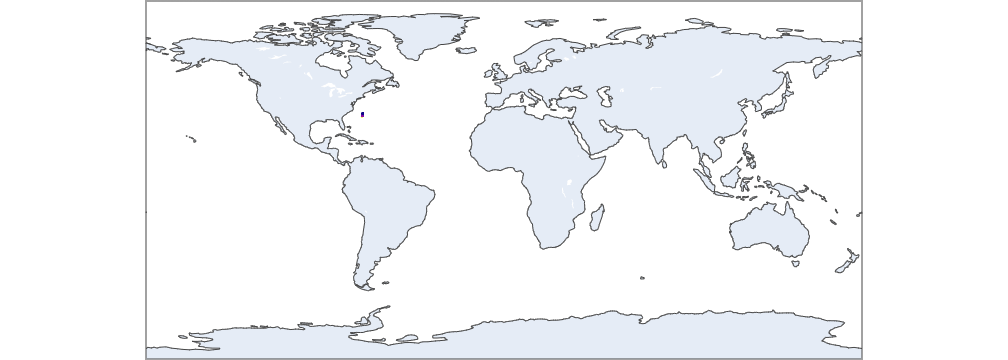

In [140]:
def plot_SODA_optical_depth(ACTIVATE, field, fill_value, scale_factor = 1):
    
    df = ACTIVATE[["lat", "long", field]].query(f"{field} != {fill_value}")
    
    fig = go.Figure()
    
    fig.add_trace(
        go.Scattergeo(
            lon = (-1 * df["long"]),
            lat = df["lat"],
            hoverinfo = "text",
            text = field + ": " + (df[field] * scale_factor).astype(str),
            mode = "markers",
            marker = dict(size = 2, color = df[field])
        )
    )
    
    fig.update_layout(margin=dict(l=1, r=1, t=1, b=1))
    fig.show()

plot_SODA_optical_depth(ACTIVATE, "Optical_Depth_MODIS_550", -32768, 0.001)